In [16]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip, cPickle

from collections import namedtuple

In [56]:
files = glob.glob('../results/a4-Apr2/e*') 

In [57]:
files, len(files)

(['../results/a4-Apr2/errors0.pkl.gz',
  '../results/a4-Apr2/errors3.pkl.gz',
  '../results/a4-Apr2/errors8.pkl.gz',
  '../results/a4-Apr2/errors2.pkl.gz',
  '../results/a4-Apr2/errors9.pkl.gz',
  '../results/a4-Apr2/errors4.pkl.gz',
  '../results/a4-Apr2/errors12.pkl.gz',
  '../results/a4-Apr2/errors6.pkl.gz',
  '../results/a4-Apr2/errors10.pkl.gz',
  '../results/a4-Apr2/errors11.pkl.gz',
  '../results/a4-Apr2/errors1.pkl.gz',
  '../results/a4-Apr2/errors7.pkl.gz',
  '../results/a4-Apr2/errors16.pkl.gz',
  '../results/a4-Apr2/errors99.pkl.gz',
  '../results/a4-Apr2/errors14.pkl.gz',
  '../results/a4-Apr2/errors13.pkl.gz',
  '../results/a4-Apr2/errors5.pkl.gz',
  '../results/a4-Apr2/errors17.pkl.gz',
  '../results/a4-Apr2/errors18.pkl.gz',
  '../results/a4-Apr2/errors22.pkl.gz',
  '../results/a4-Apr2/errors26.pkl.gz',
  '../results/a4-Apr2/errors24.pkl.gz',
  '../results/a4-Apr2/errors20.pkl.gz',
  '../results/a4-Apr2/errors30.pkl.gz',
  '../results/a4-Apr2/errors25.pkl.gz',
  '../resu

In [58]:
ex_list = []
for filename in files:
    ex = []
    ex.append(filename)
    with gzip.open(filename, "r") as f:
        with gzip.open(filename.replace('errors', 'params'), 'r') as f_param:
            errors = cPickle.load(f)
            params = cPickle.load(f_param)
            ex.extend(errors)
            ex.extend(params)
        
    ex_list.append(ex)

In [59]:
for ex in ex_list:
    if np.isnan(ex[6]):
        ex[6] = 0.005
        ex[7] = 0.005
        ex[8] = 0.005
        ex[9] = 0.005

In [60]:
list(enumerate(ex_list[0]))

[(0, '../results/a4-Apr2/errors0.pkl.gz'),
 (1, array([ 0.00027497,  0.00035697,  0.00023009,  0.00022318,  0.00020909,
          0.00021558,  0.00021499])),
 (2, array([  3.86613007e+02,   1.10609911e-03,   6.04715955e-04,
           6.00176863e-04,   5.99538733e-04,   5.98786981e-04,
           5.90629119e-04])),
 (3, 31.060219049453735),
 (4, 0.00020766127),
 (5, 0.000590629),
 (6, 0.00082697731),
 (7, 0.0020900303),
 (8, 0.00032291305),
 (9, 0.00082082563),
 (10, 8101),
 (11, 1.0171308106267528e-05),
 (12, [0.75323092960662319, 0.86453966689795592]),
 (13, 0.028589332399440393),
 (14, 0.015218308173310031)]

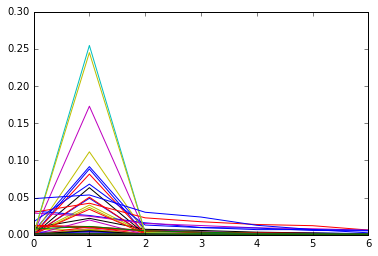

In [61]:
for i, ex in enumerate(ex_list):
    plt.plot(ex[1], label=str(i))

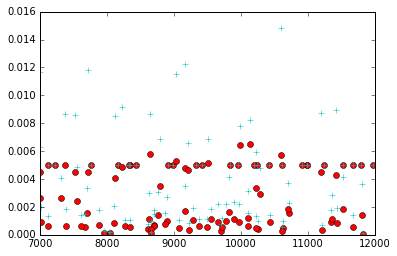

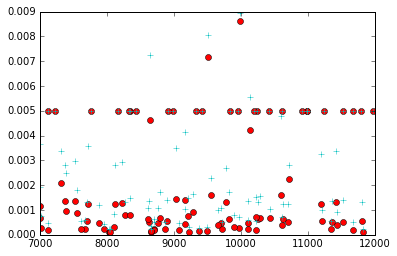

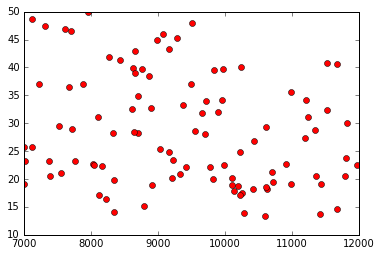

In [62]:
# batchsizeは関係無い 速さ的に１万
plt.plot([ex[10] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[3] for ex in ex_list], 'ro')

plt.figure()

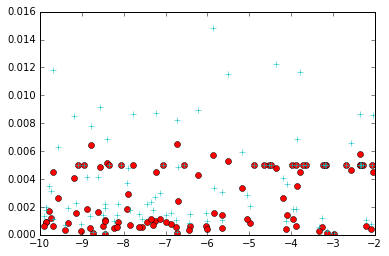

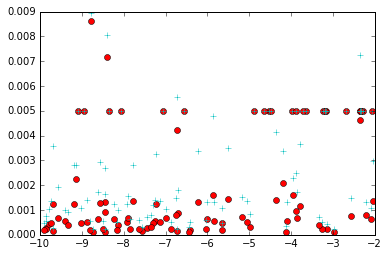

In [63]:
# l2 うーんないほうがいい？
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.figure()
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')

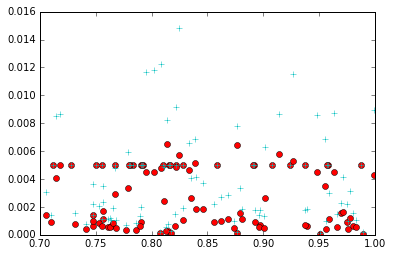

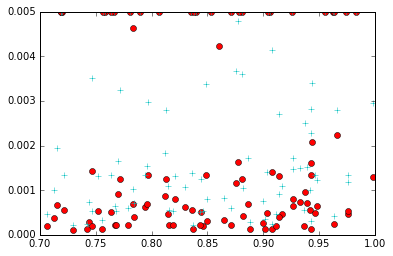

In [64]:
# dropout やっぱ0.8くらい
plt.plot([ex[12][0] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[12][0] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')

plt.figure()
plt.plot([ex[12][1] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[12][1] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.005) 
plt.figure()

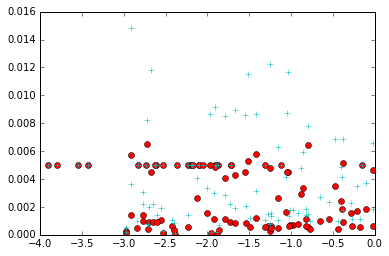

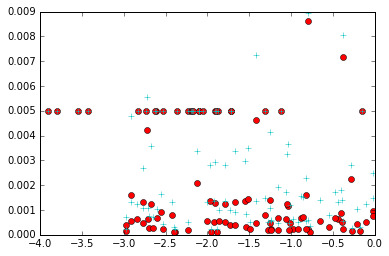

In [65]:
# gamma_scale 敏感すぎ 0.1
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.figure()
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')

/Users/matsuik/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from IPython.kernel.zmq import kernelapp as app
/Users/matsuik/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/matsuik/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/matsuik/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


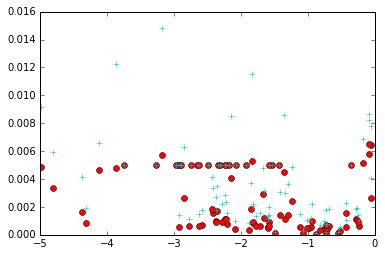

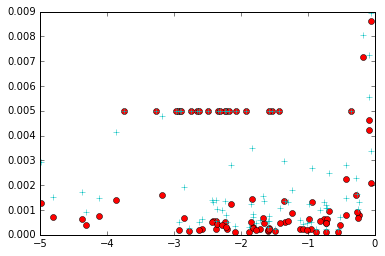

In [66]:
# bias_scale 0.1
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.figure()
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')